In [1]:
from Functions_lab4 import*

# Task 1a


In [2]:
#parameters
base_dense=8
batch_size=8
LR=0.00001
img_w,img_h,img_ch=256,256,1


#metrics list
metric_list=[dice_coef,"Precision",'Recall']

#loss functions list
loss_func_list=[dice_coef_loss,'binary_crossentropy']


In [3]:
def load_data(data_list,img_w,img_h,img_ch,mask=False):
    tab = np.zeros((len(data_list),img_w,img_h,img_ch),dtype='float32')
    for i in range(len(data_list)):
        Img = cv2.imread(data_list[i],0)
        Img = cv2.resize(Img, (img_w, img_h))
        Img = Img.reshape(img_w,img_h)/255
        if mask:
            Img[Img>0]=1
            Img[Img!=1]=0
        tab[i,:,:,0]=Img
    return tab

In [4]:
#load the X_ray images

#first create the set with the dir info
x_train,y_train,x_test,y_test = create_data('Lab3','X_ray',0.8)

#then load the images thanks to the info
x_train = load_data(x_train,img_w,img_h,img_ch)
y_train = load_data(y_train,img_w,img_h,img_ch)
x_test = load_data(x_test,img_w,img_h,img_ch)
y_test = load_data(y_test,img_w,img_h,img_ch)


#the intensity and resize rescale are already done in load_data function


In [5]:
my_model=get_unet(base_dense,img_w,img_h,img_ch,dropout=False,dr=0.2)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 8)  80          input_layer[0][0]                
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 8)  584         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 8)  0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [25]:
model_hist=compile_fit(my_model,loss_function='binary_crossentropy', optimizer=Adam(LR),metrics=[dice_coef],x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test,batch_size=batch_size,n_epochs=150)

Train on 187 samples, validate on 47 samples
Epoch 1/150
187/187 [==============================] - 3s 18ms/sample - loss: 0.6872 - dice_coef: 0.3751 - val_loss: 0.6813 - val_dice_coef: 0.3632
Epoch 2/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.6784 - dice_coef: 0.3684 - val_loss: 0.6688 - val_dice_coef: 0.3533
Epoch 3/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.6654 - dice_coef: 0.3521 - val_loss: 0.6490 - val_dice_coef: 0.3329
Epoch 4/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.6369 - dice_coef: 0.3247 - val_loss: 0.5860 - val_dice_coef: 0.3014
Epoch 5/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.4947 - dice_coef: 0.3948 - val_loss: 0.4209 - val_dice_coef: 0.4524
Epoch 6/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.3945 - dice_coef: 0.4947 - val_loss: 0.3594 - val_dice_coef: 0.5125
Epoch 7/150
187/187 [==============================] - 1s 4ms/sample - l

187/187 [==============================] - 1s 4ms/sample - loss: 0.0524 - dice_coef: 0.9496 - val_loss: 0.0586 - val_dice_coef: 0.9446
Epoch 57/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.0499 - dice_coef: 0.9505 - val_loss: 0.0595 - val_dice_coef: 0.9429
Epoch 58/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.0505 - dice_coef: 0.9509 - val_loss: 0.0589 - val_dice_coef: 0.9438
Epoch 59/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.0484 - dice_coef: 0.9522 - val_loss: 0.0593 - val_dice_coef: 0.9448
Epoch 60/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.0498 - dice_coef: 0.9515 - val_loss: 0.0815 - val_dice_coef: 0.9308
Epoch 61/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.0588 - dice_coef: 0.9468 - val_loss: 0.0602 - val_dice_coef: 0.9414
Epoch 62/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.0484 - dice_coef: 0.9506 - val_loss: 0.0536 -

187/187 [==============================] - 1s 4ms/sample - loss: 0.0353 - dice_coef: 0.9654 - val_loss: 0.0481 - val_dice_coef: 0.9577
Epoch 112/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.0348 - dice_coef: 0.9656 - val_loss: 0.0481 - val_dice_coef: 0.9574
Epoch 113/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.0355 - dice_coef: 0.9653 - val_loss: 0.0649 - val_dice_coef: 0.9504
Epoch 114/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.0387 - dice_coef: 0.9633 - val_loss: 0.0477 - val_dice_coef: 0.9579
Epoch 115/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.0376 - dice_coef: 0.9636 - val_loss: 0.0487 - val_dice_coef: 0.9570
Epoch 116/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.0352 - dice_coef: 0.9649 - val_loss: 0.0497 - val_dice_coef: 0.9566
Epoch 117/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.0365 - dice_coef: 0.9648 - val_loss: 0.

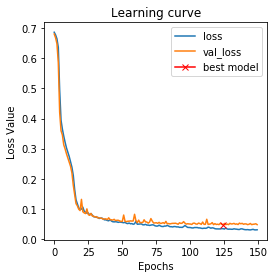

In [26]:
loss_curves_plot(model_hist)

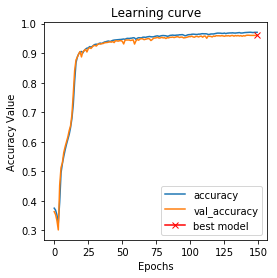

In [27]:
accuracy_curves_plot(model_hist,'dice_coef')

# Task 1b

In [6]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + K.epsilon()) / (K.sum(y_true_f) + K.sum(y_pred_f) + K.epsilon())

def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

In [7]:
model_hist=compile_fit(my_model,loss_function=dice_coef_loss, optimizer=Adam(LR),metrics=[dice_coef],x_train=x_train,y_train=y_train,
                       x_test=x_test,y_test=y_test,batch_size=batch_size,n_epochs=150)

Train on 187 samples, validate on 47 samples
Epoch 1/150
187/187 [==============================] - 2s 12ms/sample - loss: 0.6195 - dice_coef: 0.3806 - val_loss: 0.6231 - val_dice_coef: 0.3775
Epoch 2/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.6194 - dice_coef: 0.3804 - val_loss: 0.6228 - val_dice_coef: 0.3769
Epoch 3/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.6192 - dice_coef: 0.3816 - val_loss: 0.6231 - val_dice_coef: 0.3772
Epoch 4/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.6191 - dice_coef: 0.3816 - val_loss: 0.6228 - val_dice_coef: 0.3770
Epoch 5/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.6191 - dice_coef: 0.3810 - val_loss: 0.6227 - val_dice_coef: 0.3776
Epoch 6/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.6189 - dice_coef: 0.3795 - val_loss: 0.6226 - val_dice_coef: 0.3773
Epoch 7/150
187/187 [==============================] - 1s 4ms/sample - l

187/187 [==============================] - 1s 4ms/sample - loss: 0.1412 - dice_coef: 0.8592 - val_loss: 0.1436 - val_dice_coef: 0.8562
Epoch 57/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.1382 - dice_coef: 0.8621 - val_loss: 0.1426 - val_dice_coef: 0.8573
Epoch 58/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.1412 - dice_coef: 0.8595 - val_loss: 0.1402 - val_dice_coef: 0.8601
Epoch 59/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.1356 - dice_coef: 0.8642 - val_loss: 0.1394 - val_dice_coef: 0.8602
Epoch 60/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.1369 - dice_coef: 0.8625 - val_loss: 0.1395 - val_dice_coef: 0.8603
Epoch 61/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.1336 - dice_coef: 0.8656 - val_loss: 0.1393 - val_dice_coef: 0.8605
Epoch 62/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.1335 - dice_coef: 0.8650 - val_loss: 0.1367 -

187/187 [==============================] - 1s 4ms/sample - loss: 0.1108 - dice_coef: 0.8891 - val_loss: 0.1153 - val_dice_coef: 0.8847
Epoch 112/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.1112 - dice_coef: 0.8882 - val_loss: 0.1137 - val_dice_coef: 0.8862
Epoch 113/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.1113 - dice_coef: 0.8884 - val_loss: 0.1161 - val_dice_coef: 0.8839
Epoch 114/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.1132 - dice_coef: 0.8869 - val_loss: 0.1173 - val_dice_coef: 0.8827
Epoch 115/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.1102 - dice_coef: 0.8899 - val_loss: 0.1154 - val_dice_coef: 0.8848
Epoch 116/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.1108 - dice_coef: 0.8895 - val_loss: 0.1128 - val_dice_coef: 0.8873
Epoch 117/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.1111 - dice_coef: 0.8886 - val_loss: 0.

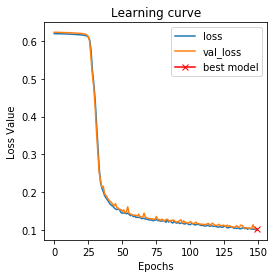

In [8]:
loss_curves_plot(model_hist)

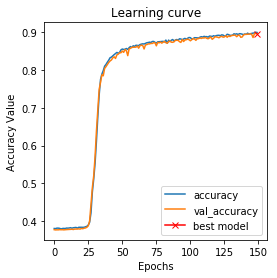

In [9]:
accuracy_curves_plot(model_hist,'dice_coef')

# Task 1c


In [10]:
#we add dropout layers
my_model1c=get_unet(base_dense,img_w,img_h,img_ch,dropout=True,dr=0.2)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 256, 256, 8)  80          input_layer[0][0]                
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 256, 256, 8)  584         conv2d_18[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 128, 128, 8)  0           conv2d_19[0][0]                  
____________________________________________________________________________________________

In [36]:
#with bce
model_hist=compile_fit(my_model1c,loss_function='binary_crossentropy', optimizer=Adam(LR),metrics=[dice_coef],x_train=x_train,y_train=y_train,
                       x_test=x_test,y_test=y_test,batch_size=batch_size,n_epochs=150)

Train on 187 samples, validate on 47 samples
Epoch 1/150
187/187 [==============================] - 2s 9ms/sample - loss: 0.6908 - dice_coef: 0.3766 - val_loss: 0.6860 - val_dice_coef: 0.3644
Epoch 2/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.6857 - dice_coef: 0.3707 - val_loss: 0.6775 - val_dice_coef: 0.3543
Epoch 3/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.6758 - dice_coef: 0.3537 - val_loss: 0.6517 - val_dice_coef: 0.3396
Epoch 4/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.5376 - dice_coef: 0.3860 - val_loss: 0.5870 - val_dice_coef: 0.3729
Epoch 5/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.4131 - dice_coef: 0.4862 - val_loss: 0.4896 - val_dice_coef: 0.4337
Epoch 6/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.3627 - dice_coef: 0.5293 - val_loss: 0.4271 - val_dice_coef: 0.4772
Epoch 7/150
187/187 [==============================] - 1s 4ms/sample - lo

187/187 [==============================] - 1s 4ms/sample - loss: 0.0747 - dice_coef: 0.9261 - val_loss: 0.0849 - val_dice_coef: 0.9152
Epoch 57/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.0720 - dice_coef: 0.9292 - val_loss: 0.0774 - val_dice_coef: 0.9199
Epoch 58/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.0738 - dice_coef: 0.9279 - val_loss: 0.0894 - val_dice_coef: 0.9114
Epoch 59/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.0716 - dice_coef: 0.9301 - val_loss: 0.0796 - val_dice_coef: 0.9164
Epoch 60/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.0733 - dice_coef: 0.9284 - val_loss: 0.0880 - val_dice_coef: 0.9100
Epoch 61/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.0715 - dice_coef: 0.9290 - val_loss: 0.0933 - val_dice_coef: 0.9091
Epoch 62/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.0698 - dice_coef: 0.9312 - val_loss: 0.0900 -

187/187 [==============================] - 1s 4ms/sample - loss: 0.0497 - dice_coef: 0.9520 - val_loss: 0.0616 - val_dice_coef: 0.9390
Epoch 112/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.0496 - dice_coef: 0.9520 - val_loss: 0.0701 - val_dice_coef: 0.9325
Epoch 113/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.0497 - dice_coef: 0.9513 - val_loss: 0.0609 - val_dice_coef: 0.9410
Epoch 114/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.0487 - dice_coef: 0.9522 - val_loss: 0.0624 - val_dice_coef: 0.9395
Epoch 115/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.0485 - dice_coef: 0.9531 - val_loss: 0.0632 - val_dice_coef: 0.9381
Epoch 116/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.0490 - dice_coef: 0.9523 - val_loss: 0.0653 - val_dice_coef: 0.9359
Epoch 117/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.0485 - dice_coef: 0.9524 - val_loss: 0.

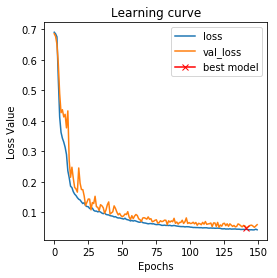

In [37]:
loss_curves_plot(model_hist)

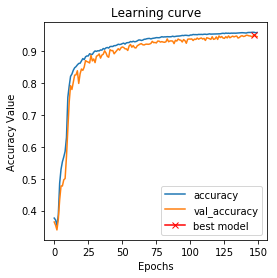

In [38]:
accuracy_curves_plot(model_hist,'dice_coef')

In [11]:
#with dice_coef_loss
model_hist=compile_fit(my_model1c,loss_function=dice_coef_loss, optimizer=Adam(LR),metrics=[dice_coef],x_train=x_train,y_train=y_train,
                       x_test=x_test,y_test=y_test,batch_size=batch_size,n_epochs=150)

Train on 187 samples, validate on 47 samples
Epoch 1/150
187/187 [==============================] - 2s 9ms/sample - loss: 0.6193 - dice_coef: 0.3809 - val_loss: 0.6227 - val_dice_coef: 0.3771
Epoch 2/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.6189 - dice_coef: 0.3818 - val_loss: 0.6228 - val_dice_coef: 0.3774
Epoch 3/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.6186 - dice_coef: 0.3813 - val_loss: 0.6223 - val_dice_coef: 0.3778
Epoch 4/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.6184 - dice_coef: 0.3821 - val_loss: 0.6222 - val_dice_coef: 0.3781
Epoch 5/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.6181 - dice_coef: 0.3813 - val_loss: 0.6219 - val_dice_coef: 0.3781
Epoch 6/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.6176 - dice_coef: 0.3822 - val_loss: 0.6215 - val_dice_coef: 0.3789
Epoch 7/150
187/187 [==============================] - 1s 4ms/sample - lo

187/187 [==============================] - 1s 4ms/sample - loss: 0.4034 - dice_coef: 0.5970 - val_loss: 0.4272 - val_dice_coef: 0.5731
Epoch 57/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.4032 - dice_coef: 0.5952 - val_loss: 0.4300 - val_dice_coef: 0.5697
Epoch 58/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.4027 - dice_coef: 0.5983 - val_loss: 0.4258 - val_dice_coef: 0.5752
Epoch 59/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.4029 - dice_coef: 0.5983 - val_loss: 0.4272 - val_dice_coef: 0.5727
Epoch 60/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.4021 - dice_coef: 0.5992 - val_loss: 0.4224 - val_dice_coef: 0.5781
Epoch 61/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.4020 - dice_coef: 0.5980 - val_loss: 0.4345 - val_dice_coef: 0.5660
Epoch 62/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.4025 - dice_coef: 0.5975 - val_loss: 0.4260 -

187/187 [==============================] - 1s 4ms/sample - loss: 0.1519 - dice_coef: 0.8480 - val_loss: 0.1579 - val_dice_coef: 0.8424
Epoch 112/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.1460 - dice_coef: 0.8534 - val_loss: 0.1820 - val_dice_coef: 0.8176
Epoch 113/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.1408 - dice_coef: 0.8600 - val_loss: 0.1735 - val_dice_coef: 0.8261
Epoch 114/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.1365 - dice_coef: 0.8628 - val_loss: 0.1607 - val_dice_coef: 0.8392
Epoch 115/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.1350 - dice_coef: 0.8652 - val_loss: 0.1745 - val_dice_coef: 0.8259
Epoch 116/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.1323 - dice_coef: 0.8677 - val_loss: 0.1670 - val_dice_coef: 0.8335
Epoch 117/150
187/187 [==============================] - 1s 4ms/sample - loss: 0.1340 - dice_coef: 0.8661 - val_loss: 0.

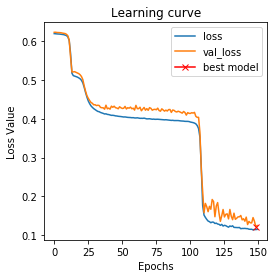

In [12]:
loss_curves_plot(model_hist)

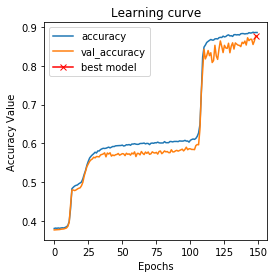

In [13]:
accuracy_curves_plot(model_hist,'dice_coef')

# Task 1d

In [5]:
#base dense is changed to 32
base_dense=32

In [11]:
my_model1d=get_unet(base_dense,img_w,img_h,img_ch,dropout=True,dr=0.2)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 256, 256, 32) 320         input_layer[0][0]                
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 256, 256, 32) 9248        conv2d_18[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 128, 128, 32) 0           conv2d_19[0][0]                  
____________________________________________________________________________________________

In [8]:
#with dice_coef_loss
model_hist=compile_fit(my_model1d,loss_function='binary_crossentropy', optimizer=Adam(LR),metrics=[dice_coef],x_train=x_train,y_train=y_train,
                       x_test=x_test,y_test=y_test,batch_size=batch_size,n_epochs=150)

Train on 187 samples, validate on 47 samples
Epoch 1/150
187/187 [==============================] - 6s 33ms/sample - loss: 0.6921 - dice_coef: 0.3801 - val_loss: 0.6915 - val_dice_coef: 0.3706
Epoch 2/150
187/187 [==============================] - 3s 15ms/sample - loss: 0.6911 - dice_coef: 0.3795 - val_loss: 0.6903 - val_dice_coef: 0.3695
Epoch 3/150
187/187 [==============================] - 3s 15ms/sample - loss: 0.6900 - dice_coef: 0.3783 - val_loss: 0.6890 - val_dice_coef: 0.3676
Epoch 4/150
187/187 [==============================] - 3s 15ms/sample - loss: 0.6887 - dice_coef: 0.3751 - val_loss: 0.6873 - val_dice_coef: 0.3670
Epoch 5/150
187/187 [==============================] - 3s 15ms/sample - loss: 0.6865 - dice_coef: 0.3741 - val_loss: 0.6839 - val_dice_coef: 0.3637
Epoch 6/150
187/187 [==============================] - 3s 15ms/sample - loss: 0.6815 - dice_coef: 0.3658 - val_loss: 0.6748 - val_dice_coef: 0.3526
Epoch 7/150
187/187 [==============================] - 3s 15ms/samp

Epoch 56/150
187/187 [==============================] - 3s 16ms/sample - loss: 0.1123 - dice_coef: 0.8908 - val_loss: 0.1245 - val_dice_coef: 0.8772
Epoch 57/150
187/187 [==============================] - 3s 16ms/sample - loss: 0.1098 - dice_coef: 0.8920 - val_loss: 0.1235 - val_dice_coef: 0.8777
Epoch 58/150
187/187 [==============================] - 3s 16ms/sample - loss: 0.1075 - dice_coef: 0.8950 - val_loss: 0.1144 - val_dice_coef: 0.8847
Epoch 59/150
187/187 [==============================] - 3s 16ms/sample - loss: 0.1059 - dice_coef: 0.8959 - val_loss: 0.1230 - val_dice_coef: 0.8808
Epoch 60/150
187/187 [==============================] - 3s 16ms/sample - loss: 0.1060 - dice_coef: 0.8967 - val_loss: 0.1335 - val_dice_coef: 0.8759
Epoch 61/150
187/187 [==============================] - 3s 16ms/sample - loss: 0.1052 - dice_coef: 0.8978 - val_loss: 0.1258 - val_dice_coef: 0.8820
Epoch 62/150
187/187 [==============================] - 3s 16ms/sample - loss: 0.1031 - dice_coef: 0.8994 

Epoch 111/150
187/187 [==============================] - 3s 16ms/sample - loss: 0.0763 - dice_coef: 0.9244 - val_loss: 0.1195 - val_dice_coef: 0.9021
Epoch 112/150
187/187 [==============================] - 3s 16ms/sample - loss: 0.0803 - dice_coef: 0.9220 - val_loss: 0.0925 - val_dice_coef: 0.9143
Epoch 113/150
187/187 [==============================] - 3s 16ms/sample - loss: 0.0771 - dice_coef: 0.9238 - val_loss: 0.0922 - val_dice_coef: 0.9149
Epoch 114/150
187/187 [==============================] - 3s 16ms/sample - loss: 0.0760 - dice_coef: 0.9251 - val_loss: 0.0901 - val_dice_coef: 0.9164
Epoch 115/150
187/187 [==============================] - 3s 16ms/sample - loss: 0.0756 - dice_coef: 0.9247 - val_loss: 0.0883 - val_dice_coef: 0.9194
Epoch 116/150
187/187 [==============================] - 3s 16ms/sample - loss: 0.0767 - dice_coef: 0.9246 - val_loss: 0.0958 - val_dice_coef: 0.9151
Epoch 117/150
187/187 [==============================] - 3s 16ms/sample - loss: 0.0747 - dice_coef: 

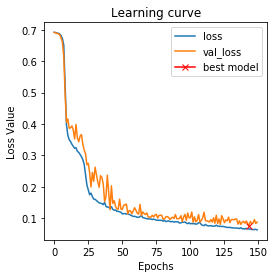

In [9]:
loss_curves_plot(model_hist)

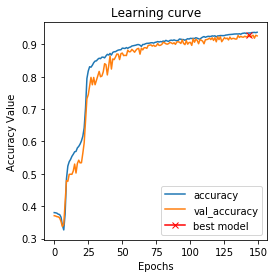

In [10]:
accuracy_curves_plot(model_hist,'dice_coef')

In [12]:
#with dice_coef_loss
model_hist=compile_fit(my_model1d,loss_function=dice_coef_loss, optimizer=Adam(LR),metrics=[dice_coef],x_train=x_train,y_train=y_train,
                       x_test=x_test,y_test=y_test,batch_size=batch_size,n_epochs=150)

Train on 187 samples, validate on 47 samples
Epoch 1/150
187/187 [==============================] - 4s 21ms/sample - loss: 0.6171 - dice_coef: 0.3834 - val_loss: 0.6259 - val_dice_coef: 0.3741
Epoch 2/150
187/187 [==============================] - 3s 16ms/sample - loss: 0.6163 - dice_coef: 0.3839 - val_loss: 0.6251 - val_dice_coef: 0.3750
Epoch 3/150
187/187 [==============================] - 3s 16ms/sample - loss: 0.6152 - dice_coef: 0.3847 - val_loss: 0.6241 - val_dice_coef: 0.3755
Epoch 4/150
187/187 [==============================] - 3s 16ms/sample - loss: 0.6136 - dice_coef: 0.3870 - val_loss: 0.6223 - val_dice_coef: 0.3782
Epoch 5/150
187/187 [==============================] - 3s 16ms/sample - loss: 0.6104 - dice_coef: 0.3894 - val_loss: 0.6178 - val_dice_coef: 0.3825
Epoch 6/150
187/187 [==============================] - 3s 16ms/sample - loss: 0.5985 - dice_coef: 0.4026 - val_loss: 0.5963 - val_dice_coef: 0.4028
Epoch 7/150
187/187 [==============================] - 3s 16ms/samp

Epoch 56/150
187/187 [==============================] - 3s 16ms/sample - loss: 0.0868 - dice_coef: 0.9134 - val_loss: 0.0954 - val_dice_coef: 0.9046
Epoch 57/150
187/187 [==============================] - 3s 17ms/sample - loss: 0.0862 - dice_coef: 0.9140 - val_loss: 0.0919 - val_dice_coef: 0.9077
Epoch 58/150
187/187 [==============================] - 3s 17ms/sample - loss: 0.0874 - dice_coef: 0.9124 - val_loss: 0.0929 - val_dice_coef: 0.9073
Epoch 59/150
187/187 [==============================] - 3s 16ms/sample - loss: 0.0847 - dice_coef: 0.9152 - val_loss: 0.0863 - val_dice_coef: 0.9137
Epoch 60/150
187/187 [==============================] - 3s 17ms/sample - loss: 0.0845 - dice_coef: 0.9150 - val_loss: 0.0875 - val_dice_coef: 0.9126
Epoch 61/150
187/187 [==============================] - 3s 17ms/sample - loss: 0.0850 - dice_coef: 0.9147 - val_loss: 0.1000 - val_dice_coef: 0.8999
Epoch 62/150
187/187 [==============================] - 3s 17ms/sample - loss: 0.0841 - dice_coef: 0.9160 

Epoch 111/150
187/187 [==============================] - 3s 17ms/sample - loss: 0.0645 - dice_coef: 0.9358 - val_loss: 0.0663 - val_dice_coef: 0.9338
Epoch 112/150
187/187 [==============================] - 3s 17ms/sample - loss: 0.0648 - dice_coef: 0.9353 - val_loss: 0.0745 - val_dice_coef: 0.9255
Epoch 113/150
187/187 [==============================] - 3s 17ms/sample - loss: 0.0645 - dice_coef: 0.9356 - val_loss: 0.0701 - val_dice_coef: 0.9301
Epoch 114/150
187/187 [==============================] - 3s 17ms/sample - loss: 0.0635 - dice_coef: 0.9365 - val_loss: 0.0711 - val_dice_coef: 0.9290
Epoch 115/150
187/187 [==============================] - 3s 17ms/sample - loss: 0.0632 - dice_coef: 0.9369 - val_loss: 0.0701 - val_dice_coef: 0.9299
Epoch 116/150
187/187 [==============================] - 3s 17ms/sample - loss: 0.0627 - dice_coef: 0.9373 - val_loss: 0.0739 - val_dice_coef: 0.9261
Epoch 117/150
187/187 [==============================] - 3s 17ms/sample - loss: 0.0628 - dice_coef: 

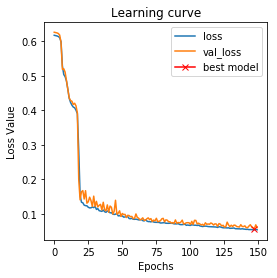

In [13]:
loss_curves_plot(model_hist)

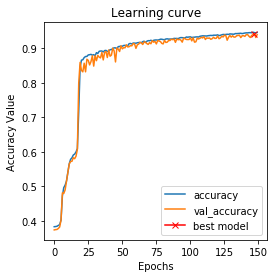

In [14]:
accuracy_curves_plot(model_hist,'dice_coef')

# Task 1e

In [15]:
#parameters 
base_dense=16


In [28]:
my_model1e=get_unet_batch(base_dense,img_w,img_h,img_ch,dropout=True,dr=0.2)

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d_58 (Conv2D)              (None, 256, 256, 16) 160         input_layer[0][0]                
__________________________________________________________________________________________________
batch_normalization_v2_22 (Batc (None, 256, 256, 16) 64          conv2d_58[0][0]                  
__________________________________________________________________________________________________
activation_20 (Activation)      (None, 256, 256, 16) 0           batch_normalization_v2_22[0][0]  
____________________________________________________________________________________________

In [23]:
#data augmentation
dictionary_augmentation = dict(
                     rotation_range=10,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zoom_range=0.2,       
                     horizontal_flip=True)


In [24]:
train_generator, STEP_SIZE_TRAIN=augmentation(x_train,y_train,dictionary_augmentation,batch_size)

In [25]:
model_hist=compile_fit_generator(my_model1e,train_generator,x_test,y_test,loss_func_list[1], optimizer=Adam(LR),metrics=metric_list[0],batch_size=batch_size,n_epochs=150,STEP_SIZE_TRAIN=STEP_SIZE_TRAIN)

Epoch 1/150
46/46 [==============================] - 11s 243ms/step - loss: 1.0442 - dice_coef: 0.4090 - val_loss: 0.7123 - val_dice_coef: 0.3742
Epoch 2/150
46/46 [==============================] - 3s 62ms/step - loss: 0.9482 - dice_coef: 0.4154 - val_loss: 0.7213 - val_dice_coef: 0.3803
Epoch 3/150
46/46 [==============================] - 3s 62ms/step - loss: 0.8580 - dice_coef: 0.4210 - val_loss: 0.7234 - val_dice_coef: 0.3866
Epoch 4/150
46/46 [==============================] - 3s 62ms/step - loss: 0.7796 - dice_coef: 0.4314 - val_loss: 0.7204 - val_dice_coef: 0.3961
Epoch 5/150
46/46 [==============================] - 3s 62ms/step - loss: 0.7100 - dice_coef: 0.4467 - val_loss: 0.7196 - val_dice_coef: 0.4147
Epoch 6/150
46/46 [==============================] - 3s 63ms/step - loss: 0.6491 - dice_coef: 0.4666 - val_loss: 0.7446 - val_dice_coef: 0.4559
Epoch 7/150
46/46 [==============================] - 3s 63ms/step - loss: 0.5801 - dice_coef: 0.5020 - val_loss: 0.7474 - val_dice_coe

46/46 [==============================] - 3s 68ms/step - loss: 0.0802 - dice_coef: 0.9141 - val_loss: 0.1141 - val_dice_coef: 0.9043
Epoch 58/150
46/46 [==============================] - 3s 67ms/step - loss: 0.0801 - dice_coef: 0.9142 - val_loss: 0.1049 - val_dice_coef: 0.9092
Epoch 59/150
46/46 [==============================] - 3s 67ms/step - loss: 0.0779 - dice_coef: 0.9175 - val_loss: 0.1142 - val_dice_coef: 0.9070
Epoch 60/150
46/46 [==============================] - 3s 67ms/step - loss: 0.0783 - dice_coef: 0.9176 - val_loss: 0.1238 - val_dice_coef: 0.9021
Epoch 61/150
46/46 [==============================] - 3s 68ms/step - loss: 0.0776 - dice_coef: 0.9173 - val_loss: 0.1178 - val_dice_coef: 0.9052
Epoch 62/150
46/46 [==============================] - 3s 67ms/step - loss: 0.0753 - dice_coef: 0.9188 - val_loss: 0.1224 - val_dice_coef: 0.9042
Epoch 63/150
46/46 [==============================] - 3s 66ms/step - loss: 0.0761 - dice_coef: 0.9197 - val_loss: 0.1188 - val_dice_coef: 0.905

46/46 [==============================] - 3s 64ms/step - loss: 0.0557 - dice_coef: 0.9460 - val_loss: 0.0755 - val_dice_coef: 0.9400
Epoch 114/150
46/46 [==============================] - 3s 64ms/step - loss: 0.0541 - dice_coef: 0.9465 - val_loss: 0.0741 - val_dice_coef: 0.9400
Epoch 115/150
46/46 [==============================] - 3s 63ms/step - loss: 0.0544 - dice_coef: 0.9471 - val_loss: 0.0767 - val_dice_coef: 0.9397
Epoch 116/150
46/46 [==============================] - 3s 64ms/step - loss: 0.0527 - dice_coef: 0.9477 - val_loss: 0.0750 - val_dice_coef: 0.9406
Epoch 117/150
46/46 [==============================] - 3s 64ms/step - loss: 0.0534 - dice_coef: 0.9475 - val_loss: 0.0769 - val_dice_coef: 0.9400
Epoch 118/150
46/46 [==============================] - 3s 63ms/step - loss: 0.0539 - dice_coef: 0.9477 - val_loss: 0.0766 - val_dice_coef: 0.9405
Epoch 119/150
46/46 [==============================] - 3s 64ms/step - loss: 0.0545 - dice_coef: 0.9469 - val_loss: 0.0724 - val_dice_coef:

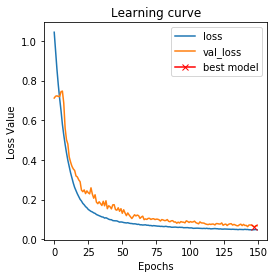

In [26]:
loss_curves_plot(model_hist)

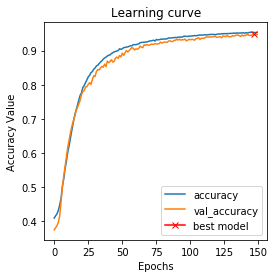

In [27]:
accuracy_curves_plot_plot(model_hist,'dice_coef')

In [29]:
model_hist=compile_fit_generator(my_model1e,train_generator,x_test,y_test,loss_func_list[0], optimizer=Adam(LR),metrics=metric_list[0],batch_size=batch_size,n_epochs=150,STEP_SIZE_TRAIN=STEP_SIZE_TRAIN)

Epoch 1/150
46/46 [==============================] - 12s 262ms/step - loss: 0.5387 - dice_coef: 0.4612 - val_loss: 0.6167 - val_dice_coef: 0.3833
Epoch 2/150
46/46 [==============================] - 3s 62ms/step - loss: 0.5010 - dice_coef: 0.4990 - val_loss: 0.5968 - val_dice_coef: 0.4032
Epoch 3/150
46/46 [==============================] - 3s 62ms/step - loss: 0.4594 - dice_coef: 0.5406 - val_loss: 0.5669 - val_dice_coef: 0.4331
Epoch 4/150
46/46 [==============================] - 3s 62ms/step - loss: 0.4238 - dice_coef: 0.5761 - val_loss: 0.5310 - val_dice_coef: 0.4690
Epoch 5/150
46/46 [==============================] - 3s 62ms/step - loss: 0.4003 - dice_coef: 0.5996 - val_loss: 0.5201 - val_dice_coef: 0.4799
Epoch 6/150
46/46 [==============================] - 3s 63ms/step - loss: 0.3766 - dice_coef: 0.6234 - val_loss: 0.4856 - val_dice_coef: 0.5144
Epoch 7/150
46/46 [==============================] - 3s 63ms/step - loss: 0.3492 - dice_coef: 0.6508 - val_loss: 0.4089 - val_dice_coe

46/46 [==============================] - 3s 66ms/step - loss: 0.0529 - dice_coef: 0.9471 - val_loss: 0.1053 - val_dice_coef: 0.8947
Epoch 58/150
46/46 [==============================] - 3s 66ms/step - loss: 0.0515 - dice_coef: 0.9485 - val_loss: 0.1109 - val_dice_coef: 0.8891
Epoch 59/150
46/46 [==============================] - 3s 66ms/step - loss: 0.0512 - dice_coef: 0.9488 - val_loss: 0.1027 - val_dice_coef: 0.8973
Epoch 60/150
46/46 [==============================] - 3s 65ms/step - loss: 0.0511 - dice_coef: 0.9489 - val_loss: 0.1123 - val_dice_coef: 0.8877
Epoch 61/150
46/46 [==============================] - 3s 63ms/step - loss: 0.0497 - dice_coef: 0.9503 - val_loss: 0.1202 - val_dice_coef: 0.8798
Epoch 62/150
46/46 [==============================] - 3s 63ms/step - loss: 0.0500 - dice_coef: 0.9499 - val_loss: 0.1179 - val_dice_coef: 0.8821
Epoch 63/150
46/46 [==============================] - 3s 63ms/step - loss: 0.0486 - dice_coef: 0.9514 - val_loss: 0.1243 - val_dice_coef: 0.875

46/46 [==============================] - 3s 63ms/step - loss: 0.0368 - dice_coef: 0.9632 - val_loss: 0.0945 - val_dice_coef: 0.9055
Epoch 114/150
46/46 [==============================] - 3s 63ms/step - loss: 0.0367 - dice_coef: 0.9633 - val_loss: 0.0987 - val_dice_coef: 0.9013
Epoch 115/150
46/46 [==============================] - 3s 63ms/step - loss: 0.0360 - dice_coef: 0.9640 - val_loss: 0.0940 - val_dice_coef: 0.9060
Epoch 116/150
46/46 [==============================] - 3s 63ms/step - loss: 0.0357 - dice_coef: 0.9643 - val_loss: 0.0912 - val_dice_coef: 0.9088
Epoch 117/150
46/46 [==============================] - 3s 63ms/step - loss: 0.0362 - dice_coef: 0.9638 - val_loss: 0.0929 - val_dice_coef: 0.9071
Epoch 118/150
46/46 [==============================] - 3s 64ms/step - loss: 0.0363 - dice_coef: 0.9637 - val_loss: 0.0873 - val_dice_coef: 0.9127
Epoch 119/150
46/46 [==============================] - 3s 64ms/step - loss: 0.0362 - dice_coef: 0.9638 - val_loss: 0.0919 - val_dice_coef:

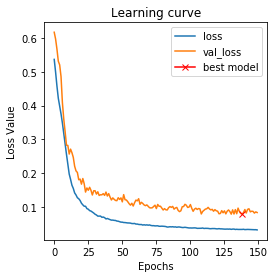

In [30]:
loss_curves_plot(model_hist)

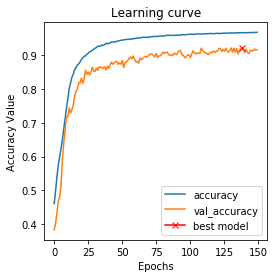

In [32]:
accuracy_curves_plot(model_hist,'dice_coef')